### Imports

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
INPUT = '../data/01_raw/train_4competition.csv'
df_original = pd.read_csv(INPUT, parse_dates=['pickup_datetime'])
df_original

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00+00:00,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20+00:00,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24+00:00,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51+00:00,-73.980901,40.764629,-73.870605,40.773963,1


### Overview

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.3+ GB


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df_original.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,55423856.00,55423856.00,55423856.00,55423480.00,55423480.00,55423856.00
mean,11.35,-72.51,39.92,-72.51,39.92,1.69
std,20.71,12.85,9.64,12.78,9.63,1.33
min,-300.00,-3442.06,-3492.26,-3442.02,-3547.89,0.00
25%,6.00,-73.99,40.73,-73.99,40.73,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.96,40.77,2.00
max,93963.36,3457.63,3408.79,3457.62,3537.13,208.00


In [6]:
df_original['fare_amount'].describe()

count   55423856.00
mean          11.35
std           20.71
min         -300.00
25%            6.00
50%            8.50
75%           12.50
max        93963.36
Name: fare_amount, dtype: float64

### Missing values

In [7]:
df_original.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

### Boxplots of numeric columns

In [8]:
num_cols = df_original.select_dtypes(include=['number']).columns

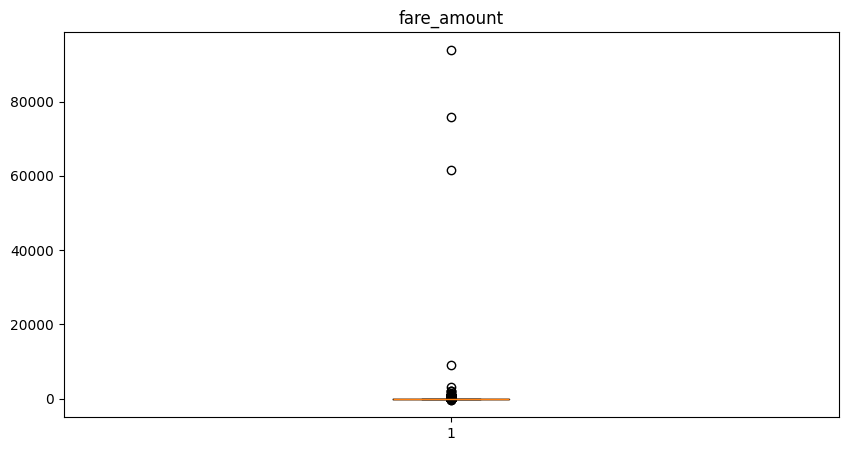

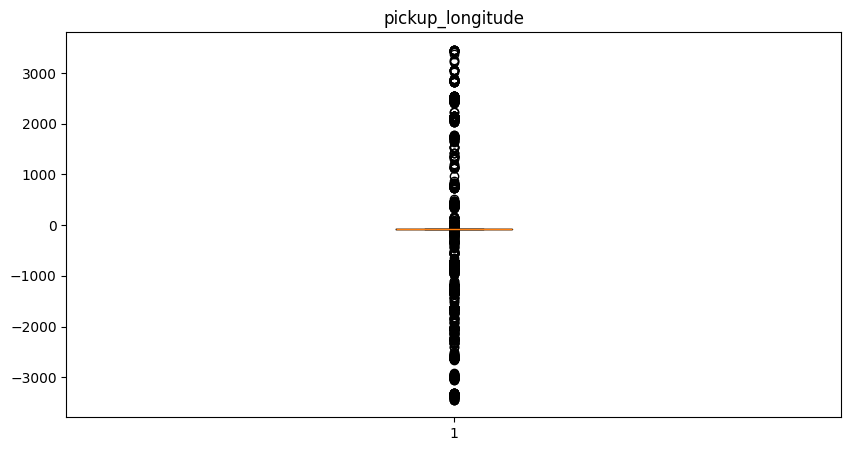

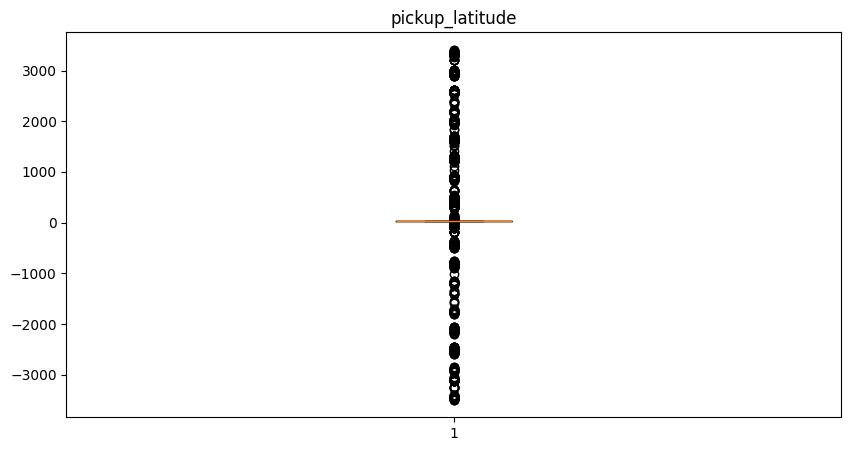

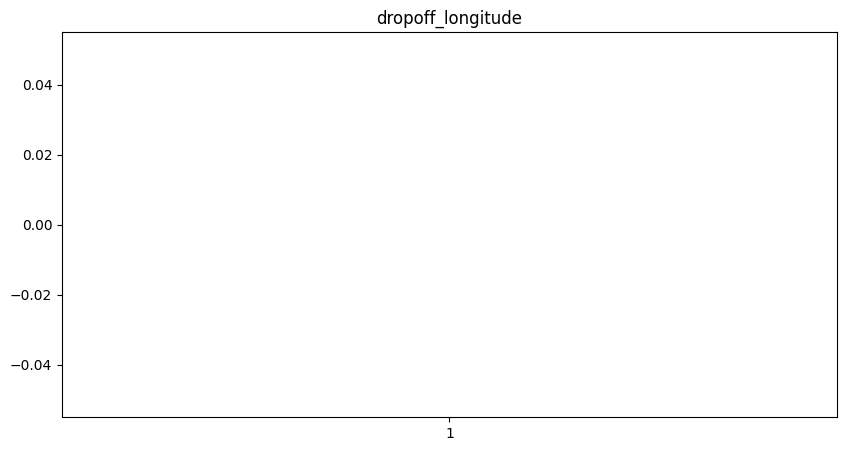

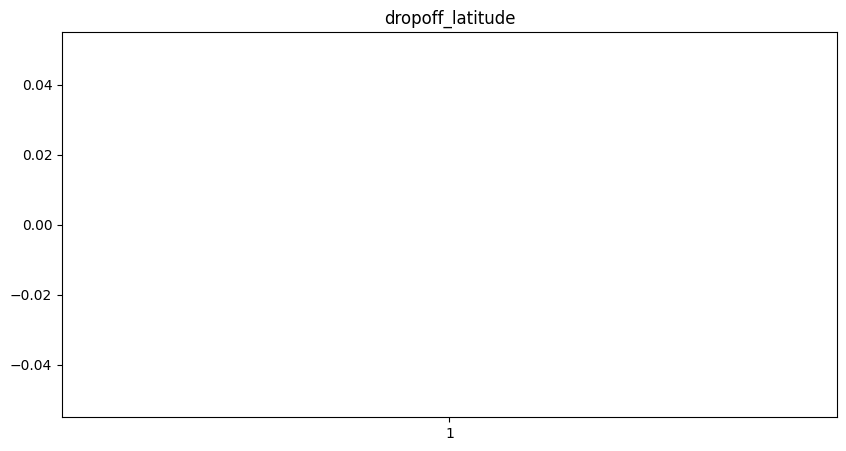

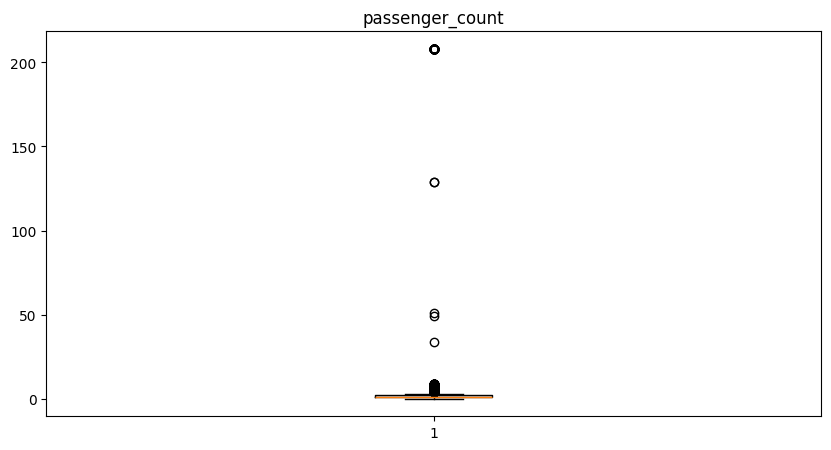

In [9]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_original[col])
    plt.title(col)
    plt.show()

### Scatterplots

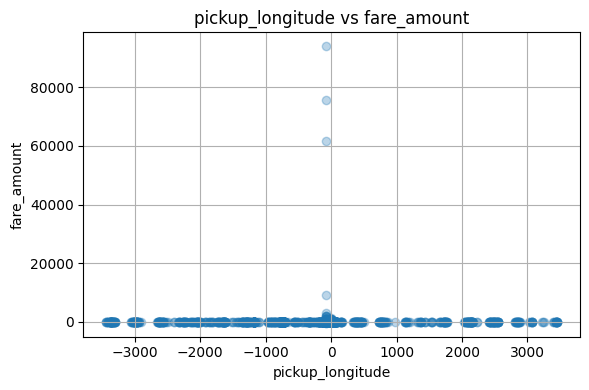

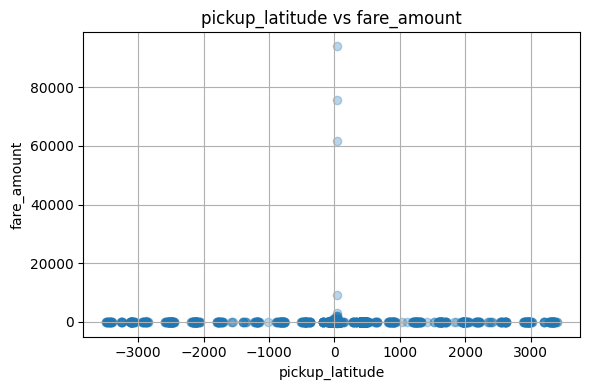

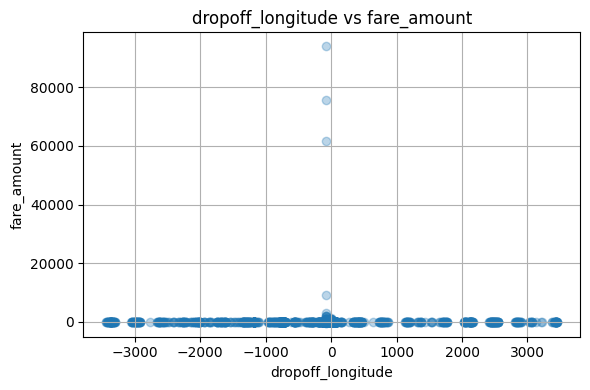

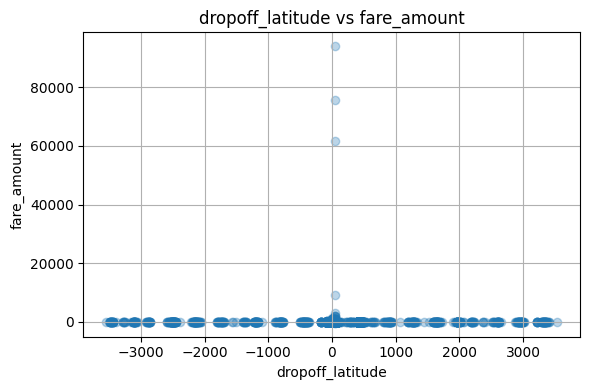

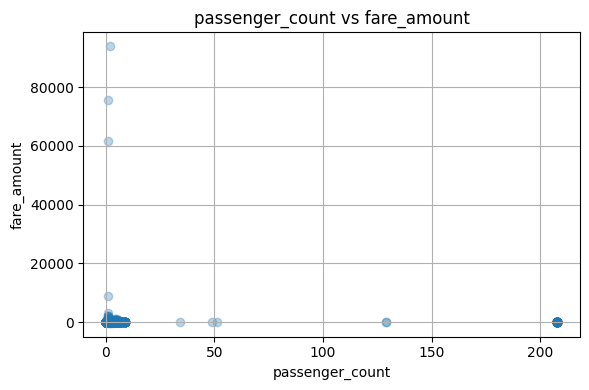

In [10]:
features = [
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'passenger_count'
]

target = 'fare_amount'
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_original[feature], df_original[target], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Cleaning

In [11]:
df = df_original.copy()

##### Amount

In [12]:
### The amount should be positive
df = df[df['fare_amount'] > 0]
df = df[df['fare_amount'] < 1000]

##### Coordinates - shouldn't be null, should be a NYC location - 

In [13]:
df = df.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], how='any')

In [14]:
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0) & (df['pickup_latitude'] != 0) & (df['dropoff_latitude'] != 0)]

In [15]:
#### The values of the longitude and latitude are not in the range of the world map
# The longitude should be between -180 and 180
# The latitude should be between -90 and 90
df = df[df['pickup_longitude'].between(-180, 180) & df['dropoff_longitude'].between(-180, 180) & df['pickup_latitude'].between(-90,90) & df['dropoff_latitude'].between(-90, 90)]

In [16]:
# The values of the longitude and latitude are not in the range of New York City
df = df[df['pickup_longitude'].between(-75, -70) & df['dropoff_longitude'].between(-75, -70) & df['pickup_latitude'].between(35,45) & df['dropoff_latitude'].between(35, 45)]

#### Passenger count must be less than 7 for a taxi

In [17]:
df = df[(df['passenger_count'] <= 6) & (df['passenger_count'] > 0)]

In [18]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,54072573.00,54072573.00,54072573.00,54072573.00,54072573.00,54072573.00
mean,11.33,-73.98,40.75,-73.97,40.75,1.69
std,9.70,0.04,0.03,0.04,0.04,1.31
min,0.01,-75.00,35.06,-75.00,35.04,1.00
25%,6.00,-73.99,40.74,-73.99,40.74,1.00
50%,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,12.50,-73.97,40.77,-73.97,40.77,2.00
max,978.00,-70.00,44.98,-70.00,44.98,6.00


In [19]:
df.shape

(54072573, 8)

In [20]:
df[df['fare_amount'] > 200]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
101885,2011-09-12 09:33:56.0000004,500.00,2011-09-12 09:33:56+00:00,-73.97,40.64,-73.97,40.64,1
130460,2012-09-01 13:24:00.000000160,281.05,2012-09-01 13:24:00+00:00,-73.79,40.64,-73.09,41.21,1
142550,2012-10-30 20:38:00.00000095,255.00,2012-10-30 20:38:00+00:00,-73.92,40.74,-73.92,40.74,1
168218,2015-01-02 11:55:03.0000005,235.00,2015-01-02 11:55:03+00:00,-73.86,40.77,-73.86,40.77,2
202499,2012-08-06 02:35:00.00000041,225.00,2012-08-06 02:35:00+00:00,-73.54,41.05,-73.54,41.05,1
...,...,...,...,...,...,...,...,...
55157484,2013-02-01 04:28:00.0000001,209.00,2013-02-01 04:28:00+00:00,-73.97,40.76,-73.54,41.05,1
55193334,2014-12-08 00:49:00.0000009,251.00,2014-12-08 00:49:00+00:00,-73.83,40.72,-74.44,40.50,1
55302684,2015-05-26 22:14:45.0000005,220.00,2015-05-26 22:14:45+00:00,-72.95,40.81,-72.95,40.81,1
55326797,2014-12-05 02:22:35.0000001,300.00,2014-12-05 02:22:35+00:00,-73.98,40.77,-73.98,40.77,1


### Boxplots after cleaning

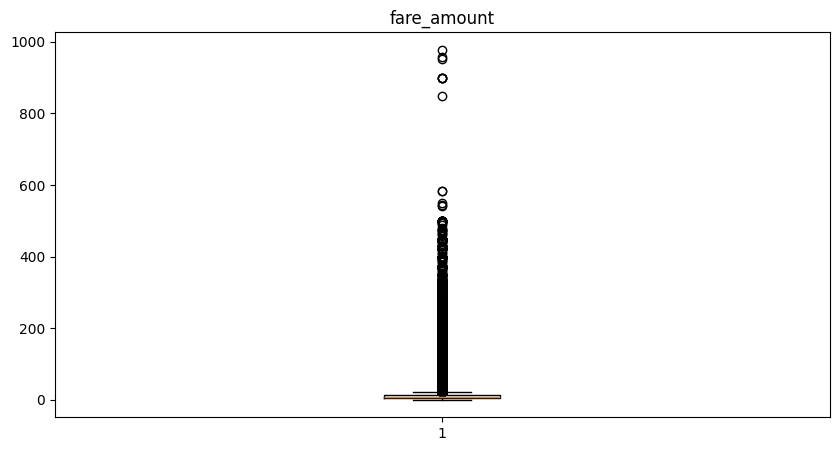

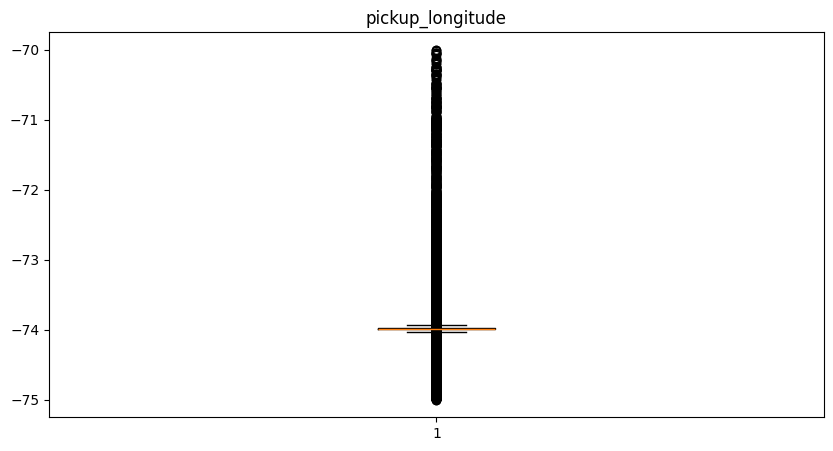

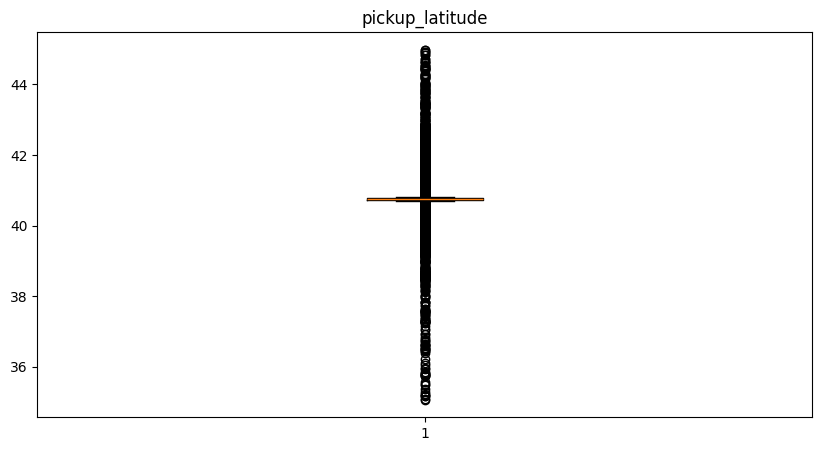

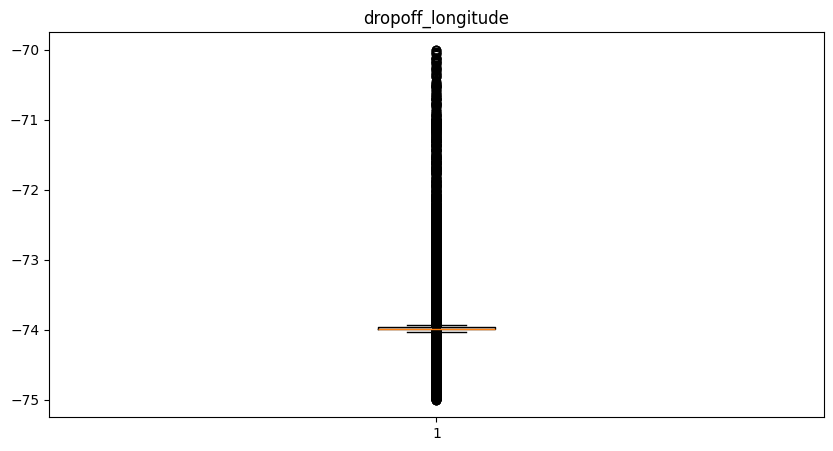

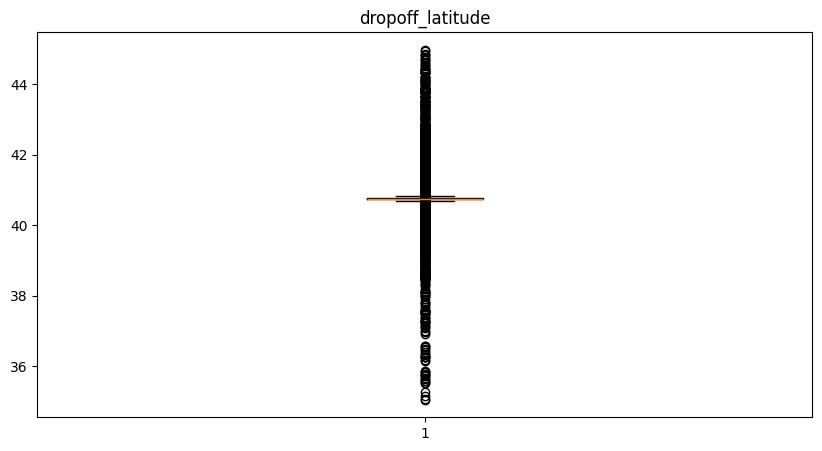

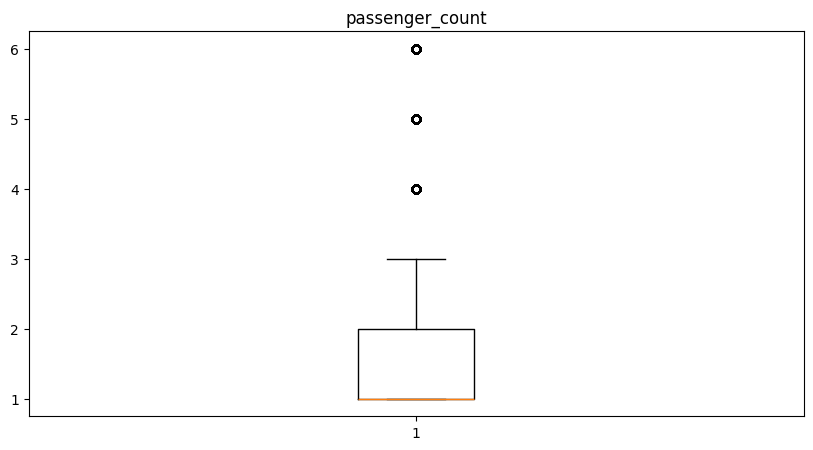

In [21]:
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

### Scatterplots after cleaning

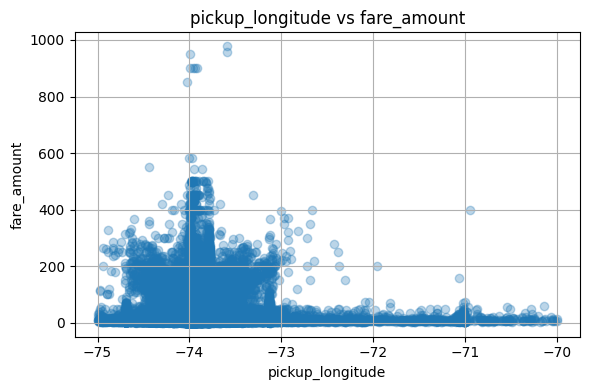

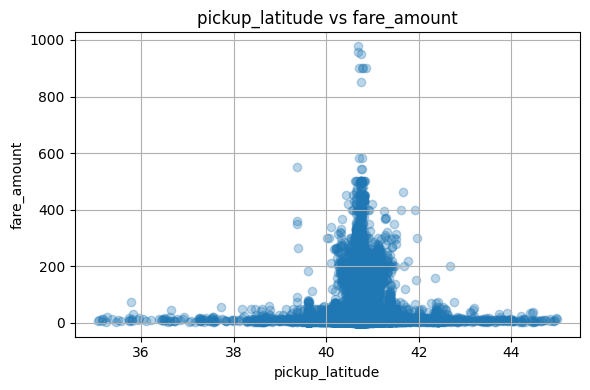

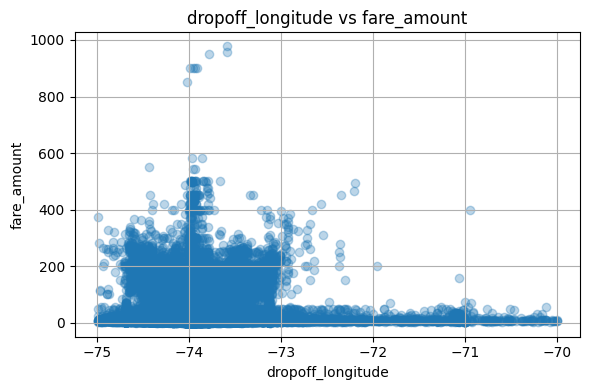

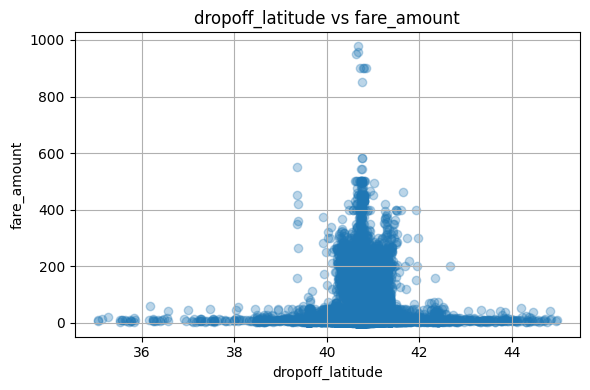

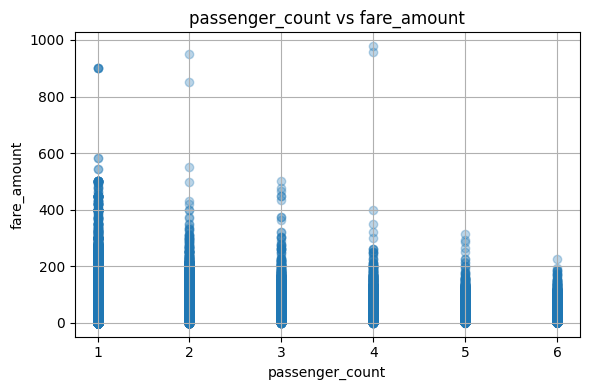

In [22]:
features = [
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'passenger_count'
]

target = 'fare_amount'
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Correlations

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54072573 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.6+ GB


<Axes: >

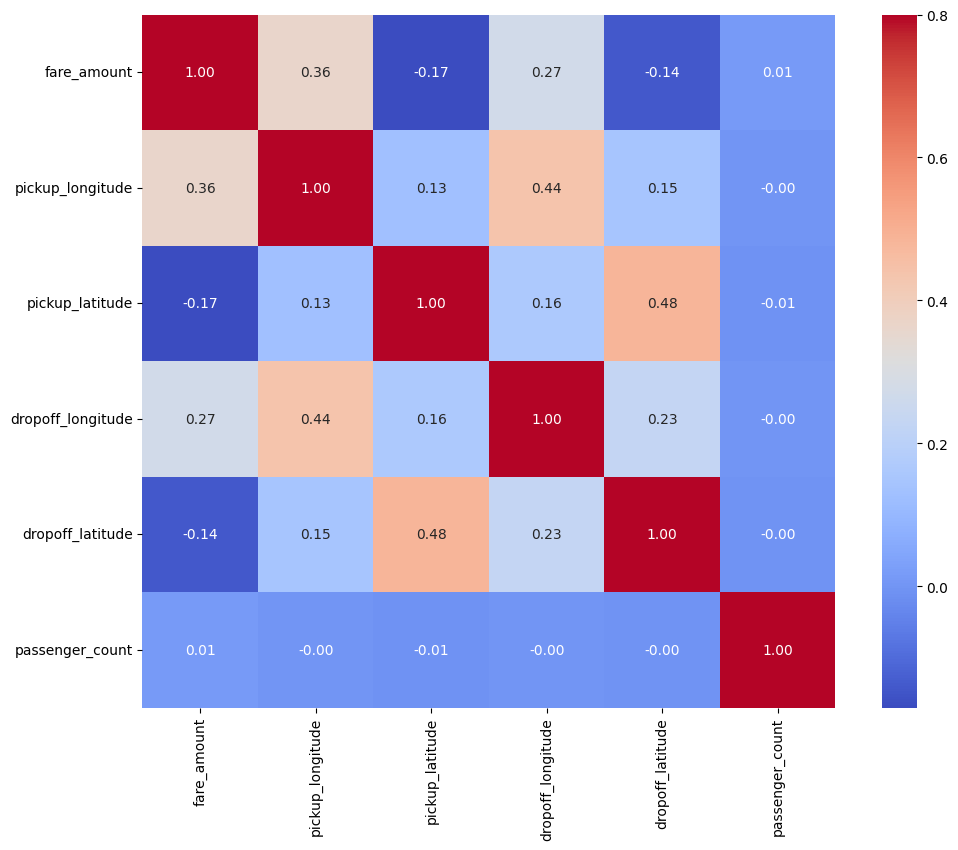

In [24]:
corrmat = df.select_dtypes(include="number").corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="coolwarm",  annot=True, fmt=".2f", annot_kws={"size": 10})

### Exporting the cleaned dataset

In [25]:
df.to_csv('../data/02_processed/df_cleaned.csv', index=False)